# Linear regression
We will try to predict house prices of california using linear regression

## Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


## Model
Our model will be a simple **Linear Regression** with one change on it... It will only measure between 0 and 100000.
Our data will be scaled between 0 and 1, we don't want the model to predict negative values.

In [2]:
# BEGIN: Ensure predictions are between 0 and 100000
class ClippedLinearRegression(LinearRegression):
    def predict(self, X):
        return np.clip(super().predict(X), 0, 100000)


## Dataset
We will use a California Houses dataset that can be found on Kaggle

In [3]:
houses_df = pd.read_csv('California_Houses.csv')
houses_df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


We will stay with the Median_House_Value as the value we want to predict
And the features will be all the other columns

In [4]:
target= houses_df['Median_House_Value']
features= houses_df.drop('Median_House_Value', axis=1)


We will scale our target value

In [5]:
target_scaler = MinMaxScaler()
target_scaled = target_scaler.fit_transform(target.values.reshape(-1, 1))

We will also scale our features values

In [6]:
# Scale all the feature variables with MinMaxScaler
features_scaler = MinMaxScaler()
features_scaled = features_scaler.fit_transform(features)

We will ensure our target values are between 0 and 1

In [7]:
# Ensure the target values are between 0 and 1
target_scaled = np.clip(target_scaled, 0, 1)

Divide everything in train and test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, random_state=42)

## Model
We will create our ClippedLinearRegression model and fit it with the train data

In [9]:

model = ClippedLinearRegression()
model.fit(X_train, y_train)




ClippedLinearRegression()

Done, let's predict our test data

In [10]:
# Make predictions
y_pred = model.predict(X_test)

Let's see how important was each variable for the models output

In [11]:
# Get the coefficients of the model
coefficients = model.coef_[0]

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance': coefficients
})

# Sort the features by their importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                     Feature  Importance
3               Tot_Bedrooms    1.394859
0              Median_Income    1.175447
10      Distance_to_SanDiego    0.589840
5                 Households    0.553931
11       Distance_to_SanJose    0.292528
1                 Median_Age    0.094255
8          Distance_to_coast   -0.164723
12  Distance_to_SanFrancisco   -0.275055
9             Distance_to_LA   -0.313717
2                  Tot_Rooms   -0.450676
7                  Longitude   -0.557001
6                   Latitude   -0.852082
4                 Population   -2.905114


Now let's see the MSE of the model

In [12]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.020101371600782122


0.020101371600782122 seems pretty decent.
Let's rescale our test targets and our predictions

In [13]:
y_test = target_scaler.inverse_transform(y_test)
y_pred = target_scaler.inverse_transform(y_pred)


## Plotting
Let's plot the difference between our prediction and our test data, in most cases, it should be approaching to 0 (This means that the prediction was accurate)

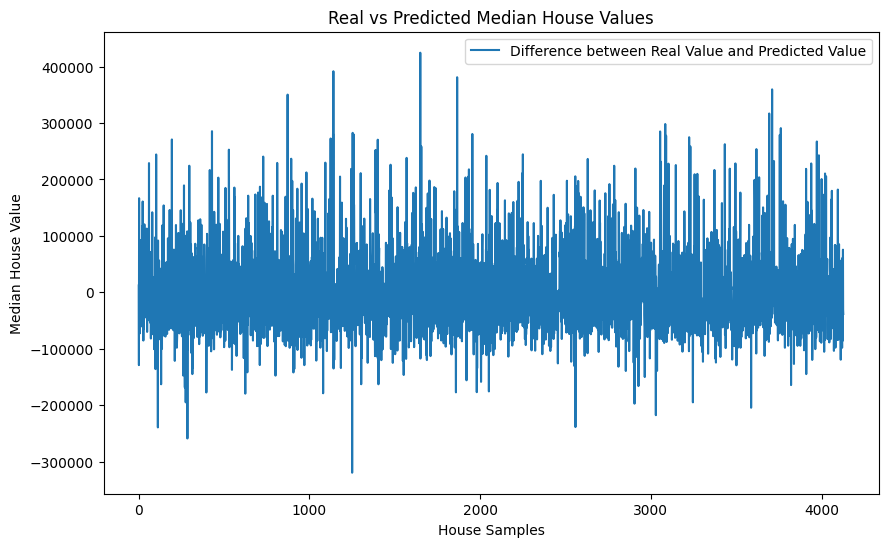

In [14]:

plt.figure(figsize=(10, 6))
plt.plot(y_test-y_pred, label='Difference between Real Value and Predicted Value')
plt.xlabel('House Samples')
plt.ylabel('Median House Value')
plt.title('Real vs Predicted Median House Values')
plt.legend()
plt.show()